Nous allons traiter les données sur Python en utilisant SciKit-Learn.

# 1. Importation des données

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nous importons les données grâce à pandas.

In [5]:
data = pd.read_csv('C:/Users/Bertrand/Desktop/M2/FDEC/Projet/donnees-defi-egc.csv' )
print(data.shape)
data.head()

(15375, 34)


,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,?,?,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,?,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,?,2014,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,...,?,?,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,?,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,?,?,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


In [6]:
data.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
count,15375.000000,15375.000000,1.537500e+04,1.537500e+04,15375.000000,15375.000000,15375.000000,15375.000000,15375.000000
mean,3.680455,2004.927610,1.914222e+06,4.223314e+06,0.325268,0.060423,0.215610,0.046959,0.133984
std,1.678015,2.604701,1.001492e+03,1.319505e+03,0.468490,0.238276,0.411258,0.211559,0.340646
min,1.000000,2004.000000,1.911907e+06,4.220467e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2004.000000,1.913352e+06,4.222201e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2004.000000,1.914340e+06,4.223104e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2004.000000,1.915048e+06,4.224558e+06,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,2015.000000,1.916252e+06,4.226534e+06,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Analyse des données avant traitement

Nous allons déterminer le nombre de valeurs manquantes pour chacun des attributs.

In [7]:
data = data.replace('?',np.nan)

missing_values = data.isnull().sum()
missing_values

ADR_SECTEUR                       0
ANNEEDEPLANTATION                 0
ANNEEREALISATIONDIAGNOSTIC        8
ANNEETRAVAUXPRECONISESDIAG     4511
CODE                              0
CODE_PARENT                       0
CODE_PARENT_DESC                  0
DIAMETREARBREAUNMETRE            67
ESPECE                         1018
FREQUENTATIONCIBLE                1
GENRE_BOTA                        0
IDENTIFIANTPLU                15014
INTITULEPROTECTIONPLU         15014
NOTEDIAGNOSTIC                   40
PRIORITEDERENOUVELLEMENT        127
RAISONDEPLANTATION            15145
REMARQUES                     11176
SOUS_CATEGORIE                    0
SOUS_CATEGORIE_DESC               0
STADEDEDEVELOPPEMENT             51
STADEDEVELOPPEMENTDIAG           13
TRAITEMENTCHENILLES           14287
TRAVAUXPRECONISESDIAG          4525
TROTTOIR                          0
TYPEIMPLANTATIONPLU           15014
VARIETE                       13212
VIGUEUR                          11
coord_x                     

On enlève les attributs ayant trop de valeurs manquantes pour être utile pour l'étude. On choisit d'enlever les attributs avec plus de 10000 valeurs manquantes.

In [8]:
data = data.drop(columns=['IDENTIFIANTPLU','INTITULEPROTECTIONPLU','RAISONDEPLANTATION','REMARQUES','TRAITEMENTCHENILLES','TYPEIMPLANTATIONPLU','VARIETE'])
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,NaN,non,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,...,Controle,oui,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,NaN,oui,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


Comme il nous reste des valeurs manquantes, nous allons dans la suite enlever les arbres sur lesquels ils manquent au moins une valeur.

In [143]:
d=data.T.isnull().sum()
a=d.shape
p=[]
for i in range (0,a[0]):
    if (d[i]>0):
        p.append(i)
data1=data.drop(p)
data2=data.drop(p)
data1

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014,2019,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
3,2,2004,2014,2014,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
5,3,2004,2015,2018,ESP11866,ESP872,Pc Ch Elysés Ouest,40 à 50 cm,abies,passages fréquents et arrêts fréquents,...,Controle résistographe,non,vigoureux,1.912600e+06,4.222098e+06,1,1,0,0,0
6,6,2004,2013,2020,ESP5219,ESP1398,Prc La Bruyère accés SUD,30 à 40 cm,excelsior,passages fréquents et arrêts fréquents,...,Taille de bois mort,non,vigoureux,1.914850e+06,4.222165e+06,0,0,0,0,0
7,2,2004,2014,2014,ESP2708,ESP1311,Jard Hoche pas Est Malraux,30 à 40 cm,nigra,passages fréquents et arrêts fréquents,...,Taille de bois mort,non,vieillissement dépérissement,1.914403e+06,4.224092e+06,1,0,1,0,0
11,4,2004,2014,2014,ESP1429,ESP666,Av Champon pair,40 à 50 cm,tomentosa,passages fréquents et arrêts fréquents,...,Taille rideau,oui,vigoureux,1.914626e+06,4.223904e+06,1,0,1,0,0
12,5,2004,2013,2016,ESP19508,ESP1343,R Frederico Garcia Lorca park,20 à 30 cm,japonica,passages fréquents et arrêts fréquents,...,Taille déclaircie,oui,vigoureux,1.914915e+06,4.222701e+06,0,0,0,0,0
13,1,2005,2015,2018,ESP9274,ESP1287,Bd J Vallier voie tram pair,10 à 20 cm,verrucosa,passages fréquents et arrêts fréquents,...,Taille formation et mise au gabarit,non,vigoureux,1.913274e+06,4.223605e+06,0,0,0,0,0
17,4,2004,2015,2016,ESP30513,ESP1073,Sq L Blum ang Stalingrad,20 à 30 cm,japonica,passages fréquents et arrêts fréquents,...,Abattage,non,vieillissement dépérissement,1.914017e+06,4.222361e+06,1,0,0,0,1
19,4,2004,2013,2018,ESP23661,ESP1022,R Marquian MIN,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,Taille formation et mise au gabarit,oui,vigoureux,1.913629e+06,4.222635e+06,0,0,0,0,0


### Première méthode de transformation des données

Dans cette méthode nous allons modifier les variables qualitatives qui sont écrit avec des chaînes de caractères, par des valeurs numériques afin de pouvoir créer des Random Forest Classifier.

In [10]:
data1.columns

Index(['ADR_SECTEUR', 'ANNEEDEPLANTATION', 'ANNEEREALISATIONDIAGNOSTIC',
       'ANNEETRAVAUXPRECONISESDIAG', 'CODE', 'CODE_PARENT', 'CODE_PARENT_DESC',
       'DIAMETREARBREAUNMETRE', 'ESPECE', 'FREQUENTATIONCIBLE', 'GENRE_BOTA',
       'NOTEDIAGNOSTIC', 'PRIORITEDERENOUVELLEMENT', 'SOUS_CATEGORIE',
       'SOUS_CATEGORIE_DESC', 'STADEDEDEVELOPPEMENT', 'STADEDEVELOPPEMENTDIAG',
       'TRAVAUXPRECONISESDIAG', 'TROTTOIR', 'VIGUEUR', 'coord_x', 'coord_y',
       'DEFAUT', 'Collet', 'Houppier', 'Racine', 'Tronc'],
      dtype='object')

In [129]:
# Cette méthode n'est pas des plus optimale, mais est simple à réaliser.
X=np.array(data1.drop(columns=['ADR_SECTEUR','ANNEEDEPLANTATION','CODE','CODE_PARENT','CODE_PARENT_DESC','coord_x','coord_y','DEFAUT','Collet','Houppier','Racine','Tronc']))

P1=[]
for a in X[:,2] :
    if (a not in P1):
        P1.append(a)

P2=[]
for b in X[:,3] :
    if (b not in P2):
        P2.append(b)

P3=[]
for b in X[:,4] :
    if (b not in P3):
        P3.append(b)

P4=[]
for b in X[:,5] :
    if (b not in P4):
        P4.append(b)

P5=[]
for b in X[:,6] :
    if (b not in P5):
        P5.append(b)

P6=[]
for b in X[:,7] :
    if (b not in P6):
        P6.append(b)

P7=[]
for a in X[:,8] :
    if (a not in P7):
        P7.append(a)

P8=[]
for b in X[:,9] :
    if (b not in P8):
        P8.append(b)

P9=[]
for b in X[:,10] :
    if (b not in P9):
        P9.append(b)

P10=[]
for b in X[:,11] :
    if (b not in P10):
        P10.append(b)

P11=[]
for b in X[:,12] :
    if (b not in P11):
        P11.append(b)

P12=[]
for b in X[:,13] :
    if (b not in P12):
        P12.append(b)

P13=[]
for b in X[:,14] :
    if (b not in P13):
        P13.append(b)

data1 = data1.replace(P1,[i for i in range(len(P1))])
data1 = data1.replace(P2,[i for i in range(len(P2))])
data1 = data1.replace(P3,[i for i in range(len(P3))])
data1 = data1.replace(P4,[i for i in range(len(P4))])
data1 = data1.replace(P5,[i for i in range(len(P5))])
data1 = data1.replace(P6,[i for i in range(len(P6))])
data1 = data1.replace(P7,[i for i in range(len(P7))])
data1 = data1.replace(P8,[i for i in range(len(P8))])
data1 = data1.replace(P9,[i for i in range(len(P9))])
data1 = data1.replace(P10,[i for i in range(len(P10))])
data1 = data1.replace(P11,[i for i in range(len(P11))])
data1 = data1.replace(P12,[i for i in range(len(P12))])
data1 = data1.replace(P13,[i for i in range(len(P13))])
data1.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
count,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,...,9913.000000,9913.000000,9913.000000,9.913000e+03,9.913000e+03,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000
mean,3.644507,2005.156461,2.954807,26.034702,0.816302,13.299203,0.713911,0.563200,0.640573,0.640573,...,4.348936,0.318370,0.376980,1.914218e+06,4.223359e+06,0.360133,0.060829,0.262181,0.053062,0.132755
std,1.755231,2.949404,3.083414,31.487715,0.414926,13.070441,1.227816,0.960828,0.656682,0.656682,...,2.954560,0.465867,0.763117,9.927392e+02,1.366521e+03,0.480063,0.239029,0.439843,0.224168,0.339327
min,1.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.911907e+06,4.220481e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2004.000000,0.000000,7.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.913384e+06,4.222202e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2004.000000,2.000000,12.000000,1.000000,8.000000,0.000000,0.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.914345e+06,4.223158e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2004.000000,5.000000,33.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,1.915020e+06,4.224583e+06,1.000000,0.000000,1.000000,0.000000,0.000000
max,6.000000,2015.000000,17.000000,202.000000,2.000000,95.000000,4.000000,3.000000,3.000000,3.000000,...,14.000000,1.000000,2.000000,1.916250e+06,4.226534e+06,1.000000,1.000000,1.000000,1.000000,1.000000


### Deuxième méthode de transformation des données

Cette méthode, quant à elle, consiste à définir pour chaque modalité de chaque attribut une nouvelle colonne avec une variable binaire qui dit ou non si la modalité est vérifié ou non.

Mais nous allons traiter seulement les attributs avec des modalités string et laisser les attributs concernant les années et le secteur telles qu'elles sont.

In [153]:
from sklearn.preprocessing import OneHotEncoder
datatest = data2 [['DIAMETREARBREAUNMETRE', 'ESPECE', 'FREQUENTATIONCIBLE', 'GENRE_BOTA',
       'NOTEDIAGNOSTIC', 'PRIORITEDERENOUVELLEMENT', 'SOUS_CATEGORIE',
       'SOUS_CATEGORIE_DESC', 'STADEDEDEVELOPPEMENT', 'STADEDEVELOPPEMENTDIAG',
       'TRAVAUXPRECONISESDIAG', 'TROTTOIR', 'VIGUEUR']]
encoder = OneHotEncoder(categories='auto', drop=None, sparse=False, handle_unknown='error')

encoder.fit(datatest)

datatest = encoder.transform(datatest)
datatest = np.concatenate((np.array(data2[['ADR_SECTEUR','ANNEEDEPLANTATION','ANNEEREALISATIONDIAGNOSTIC','ANNEETRAVAUXPRECONISESDIAG']]), datatest), axis=1)
datatest

array([[5, 2014, '2014', ..., 0.0, 1.0, 0.0],
       [2, 2004, '2014', ..., 0.0, 1.0, 0.0],
       [3, 2004, '2015', ..., 0.0, 1.0, 0.0],
       ...,
       [6, 2004, '2015', ..., 0.0, 1.0, 0.0],
       [4, 2004, '2014', ..., 0.0, 1.0, 0.0],
       [1, 2014, '2014', ..., 0.0, 1.0, 0.0]], dtype=object)

In [146]:
data2 [['DIAMETREARBREAUNMETRE', 'ESPECE', 'FREQUENTATIONCIBLE', 'GENRE_BOTA',
       'NOTEDIAGNOSTIC', 'PRIORITEDERENOUVELLEMENT', 'SOUS_CATEGORIE',
       'SOUS_CATEGORIE_DESC', 'STADEDEDEVELOPPEMENT', 'STADEDEVELOPPEMENTDIAG',
       'TRAVAUXPRECONISESDIAG', 'TROTTOIR', 'VIGUEUR']]

,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR
0,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,Controle,non,vigoureux
3,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille mise en sécurité,oui,vigoureux
5,40 à 50 cm,abies,passages fréquents et arrêts fréquents,Picea,Arbre à abattre dans les 5 ans,de 1 à 5 ans,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Controle résistographe,non,vigoureux
6,30 à 40 cm,excelsior,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Taille de bois mort,non,vigoureux
7,30 à 40 cm,nigra,passages fréquents et arrêts fréquents,Populus,Arbre à abattre dans les 10 ans,de 11 à 20 ans,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre vieillissant,Taille de bois mort,non,vieillissement dépérissement
11,40 à 50 cm,tomentosa,passages fréquents et arrêts fréquents,Tilia,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille rideau,oui,vigoureux
12,20 à 30 cm,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre davenir incertain,de 11 à 20 ans,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille déclaircie,oui,vigoureux
13,10 à 20 cm,verrucosa,passages fréquents et arrêts fréquents,Betula,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre adulte,Arbre jeune,Taille formation et mise au gabarit,non,vigoureux
17,20 à 30 cm,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre à abattre dans les 5 ans,de 1 à 5 ans,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Abattage,non,vieillissement dépérissement
19,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille formation et mise au gabarit,oui,vigoureux


# Traitement des données

## Défi 1 :

### Tâche supervisée 1 : classification uni-label

#### Méthode 1 :

Nous allons créer une Random Forest Classifier pour prédire si un arbre a un défaut ou non.

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X=np.array(data1.drop(columns=['CODE','CODE_PARENT','CODE_PARENT_DESC','coord_x','coord_y','DEFAUT','Collet','Houppier','Racine','Tronc']))
y=np.array(data1['DEFAUT'])

clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print('Score de notre Random Forest Classifier pour un défaut (méthode 1) : ',scores.mean())

Score de notre Random Forest Classifier pour un défaut (méthode 1) :  0.8757183791796364


Après l'obtention de ce score, nous allons regarder si l'augmentation du nombres d'arbres dans notre Random Forest à une influence sur ce score, et en particulier si ça le fait augmenter.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

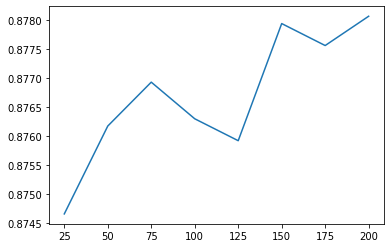

In [15]:
from sklearn.model_selection import validation_curve

model = RandomForestClassifier(max_depth=None,min_samples_split=2, random_state=0)
k=np.array(range (25,201,25))

train_score, val_score = validation_curve(model, X_train, Y_train, 'n_estimators', k, cv=5)

plt.plot(k,val_score.mean(axis=1))

On remarque que l'augmentation n'est pas significative.

Calculons maintenant l'erreur entre le test set et le predicted set.

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print('Erreur quadratique moyenne : %.4f' % mean_squared_error(Y_test,Y_pred))
print('Erreur absolue moyenne : %.4f' % mean_absolute_error(Y_test,Y_pred))

Score R²: 0.4603
Erreur quadratique moyenne : 0.1215
Erreur absolue moyenne : 0.1215


Maintenant passons au calcul de la matrice de confusion pour la prédiction d'un défaut.

In [39]:
from sklearn.metrics import confusion_matrix

CM=confusion_matrix(Y_test, Y_pred)
CM

array([[1187,  117],
       [ 124,  555]], dtype=int64)

In [71]:
print('\nNous obtenons une précision, calculée avec la matrice de confusion,  de', CM[0,0]/(CM[0,0]+CM[0,1]), 'et un rappel de', CM[0,0]/(CM[0,0]+CM[1,0]),'.\n' )


Nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9102760736196319 et un rappel de 0.9054157131960335 .



#### Méthode 2 :

Nous pouvons utiliser une autre manière de transformer nos données string en des données utilisables par

In [154]:
A = datatest
y = np.array(data1['DEFAUT'])

clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, A, y, cv=5)
print('Score de notre Random Forest Classifier pour un défaut (méthode 2) : ',scores.mean())

Score de notre Random Forest Classifier pour un défaut (méthode 2) :  0.8750114622118481


Après l'obtention de ce score, nous allons regarder si l'augmentation du nombres d'arbres dans notre Random Forest à une influence sur ce score, et en particulier si ça le fait augmenter.

In [149]:
X00_train, X00_test, Y00_train, Y00_test = train_test_split(A,y,test_size=0.2)

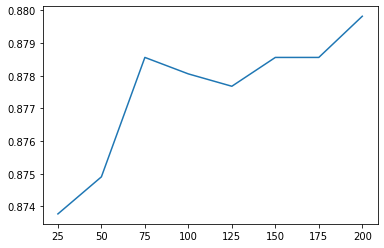

In [150]:
model = RandomForestClassifier(max_depth=None,min_samples_split=2, random_state=0)
k=np.array(range (25,201,25))

train_score, val_score = validation_curve(model, X00_train, Y00_train, 'n_estimators', k, cv=5)

plt.plot(k,val_score.mean(axis=1))

On remarque que l'augmentation n'est pas significative.

Calculons maintenant l'erreur entre le test set et le predicted set.

In [151]:
clf = clf.fit(X00_train, Y00_train)
Y00_pred = clf.predict(X00_test)

print('Erreur quadratique moyenne : %.4f' % mean_squared_error(Y00_test,Y00_pred))
print('Erreur absolue moyenne : %.4f' % mean_absolute_error(Y00_test,Y00_pred))

Erreur quadratique moyenne : 0.1180
Erreur absolue moyenne : 0.1180


Maintenant passons au calcul de la matrice de confusion pour la prédiction d'un défaut.

In [152]:
from sklearn.metrics import confusion_matrix

CM00=confusion_matrix(Y_test, Y_pred)
print('\nNous obtenons une précision, calculée avec la matrice de confusion,  de', CM00[0,0]/(CM00[0,0]+CM00[0,1]), 'et un rappel de', CM00[0,0]/(CM00[0,0]+CM00[1,0]),'.\n' )


Nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9102760736196319 et un rappel de 0.9054157131960335 .



### Tâche supervisée 2 : classification multi-label

Nous allons créer des Random Forest Classifier pour prédire où est(sont) le(s) defaut(s) sur l'arbre.

#### Méthode 1 :

Calculons dans un premier temps le score de chaque Random Forest pour chaque endroit où il peut y avoir un défaut.

In [72]:
y1=np.array(data1['Collet'])

y2=np.array(data1['Houppier'])

y3=np.array(data1['Racine'])

y4=np.array(data1['Tronc'])


scores1 = cross_val_score(clf, X, y1, cv=5)

scores2 = cross_val_score(clf, X, y2, cv=5)

scores3 = cross_val_score(clf, X, y3, cv=5)

scores4 = cross_val_score(clf, X, y4, cv=5)

print(' Voici le score pour le collet : ',scores1.mean(),'\n Voici le score pour le Houppier : ',scores2.mean(),'\n Voici le score pour la Racine : ', scores3.mean(),'\n Voici le score pour le Tronc : ', scores4.mean())

 Voici le score pour le collet :  0.9473420644601209 
 Voici le score pour le Houppier :  0.8714820548106662 
 Voici le score pour la Racine :  0.9447182940553442 
 Voici le score pour le Tronc :  0.8803608548032613


Calculons l'erreur entre chacun des Test set et Predicted set associer à un endroit de défaut possible.

In [52]:
X=np.array(data1.drop(columns=['CODE','CODE_PARENT','CODE_PARENT_DESC','coord_x','coord_y','DEFAUT','Collet','Houppier','Racine','Tronc']))

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,y1,test_size=0.2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,y2,test_size=0.2)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X,y3,test_size=0.2)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X,y4,test_size=0.2)

clf1 = clf.fit(X1_train, Y1_train)
Y1_pred = clf1.predict(X1_test)

clf2 = clf.fit(X2_train, Y2_train)
Y2_pred = clf.predict(X2_test)

clf3 = clf.fit(X3_train, Y3_train)
Y3_pred = clf.predict(X3_test)

clf4 = clf.fit(X4_train, Y4_train)
Y4_pred = clf.predict(X4_test)

print('Erreur absolue moyenne (Collet) : %.4f' % mean_absolute_error(Y1_test,Y1_pred))
print('Erreur absolue moyenne (Houppier) : %.4f' % mean_absolute_error(Y2_test,Y2_pred))
print('Erreur absolue moyenne (Racine) : %.4f' % mean_absolute_error(Y3_test,Y3_pred))
print('Erreur absolue moyenne (Tronc) : %.4f' % mean_absolute_error(Y4_test,Y4_pred))

Erreur absolue moyenne (Collet) : 0.0514
Erreur absolue moyenne (Houppier) : 0.1230
Erreur absolue moyenne (Racine) : 0.0585
Erreur absolue moyenne (Tronc) : 0.1210


Faisons de même que pour la classification uni-label avec le calcul des matrices de confusions, afin de déterminer les précisions et rappels des différentes prédictions.

In [57]:
CM1=confusion_matrix(Y1_test, Y1_pred)
CM2=confusion_matrix(Y2_test, Y2_pred)
CM3=confusion_matrix(Y3_test, Y3_pred)
CM4=confusion_matrix(Y4_test, Y4_pred)

print('Pour le collet : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM1[0,0]/(CM1[0,0]+CM1[0,1]),
      'et un rappel de', CM1[0,0]/(CM1[0,0]+CM1[1,0]),'.' )
print('\nPour le houppier : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM2[0,0]/(CM2[0,0]+CM2[0,1]),
      'et un rappel de', CM2[0,0]/(CM2[0,0]+CM2[1,0]),'.' )
print('\nPour la racine : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM3[0,0]/(CM3[0,0]+CM3[0,1]),
      'et un rappel de', CM3[0,0]/(CM3[0,0]+CM3[1,0]),'.' )
print('\nPour le tronc : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM4[0,0]/(CM4[0,0]+CM4[0,1]),
      'et un rappel de', CM4[0,0]/(CM4[0,0]+CM4[1,0]),'.' )

Pour le collet : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9877136752136753 et un rappel de 0.9590248962655602 .

Pour le houppier : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9220867208672087 et un rappel de 0.9134228187919463 .

Pour la racine : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9828234031132582 et un rappel de 0.956135770234987 .

Pour le tronc : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9603035610040864 et un rappel de 0.9053384700055036 .


#### Méthode 2 :

Calculons dans un premier temps le score de chaque Random Forest pour chaque endroit où il peut y avoir un défaut.

In [155]:
scores1 = cross_val_score(clf, A, y1, cv=5)

scores2 = cross_val_score(clf, A, y2, cv=5)

scores3 = cross_val_score(clf, A, y3, cv=5)

scores4 = cross_val_score(clf, A, y4, cv=5)

print(' Voici le score pour le collet : ',scores1.mean(),'\n Voici le score pour le Houppier : ',scores2.mean(),'\n Voici le score pour la Racine : ', scores3.mean(),'\n Voici le score pour le Tronc : ', scores4.mean())

 Voici le score pour le collet :  0.9476444327744454 
 Voici le score pour le Houppier :  0.8724928678217143 
 Voici le score pour la Racine :  0.9466351425165236 
 Voici le score pour le Tronc :  0.8807635211133441


Calculons l'erreur entre chacun des Test set et Predicted set associer à un endroit de défaut possible.

In [156]:
X12_train, X12_test, Y12_train, Y12_test = train_test_split(A,y1,test_size=0.2)
X22_train, X22_test, Y22_train, Y22_test = train_test_split(A,y2,test_size=0.2)
X32_train, X32_test, Y32_train, Y32_test = train_test_split(A,y3,test_size=0.2)
X42_train, X42_test, Y42_train, Y42_test = train_test_split(A,y4,test_size=0.2)

clf12 = clf.fit(X12_train, Y12_train)
Y12_pred = clf12.predict(X12_test)

clf22 = clf.fit(X22_train, Y22_train)
Y22_pred = clf.predict(X22_test)

clf32 = clf.fit(X32_train, Y32_train)
Y32_pred = clf.predict(X32_test)

clf42 = clf.fit(X42_train, Y42_train)
Y42_pred = clf.predict(X42_test)

print('Erreur absolue moyenne (Collet) : %.4f' % mean_absolute_error(Y12_test,Y12_pred))
print('Erreur absolue moyenne (Houppier) : %.4f' % mean_absolute_error(Y22_test,Y22_pred))
print('Erreur absolue moyenne (Racine) : %.4f' % mean_absolute_error(Y32_test,Y32_pred))
print('Erreur absolue moyenne (Tronc) : %.4f' % mean_absolute_error(Y42_test,Y42_pred))

Erreur absolue moyenne (Collet) : 0.0550
Erreur absolue moyenne (Houppier) : 0.1180
Erreur absolue moyenne (Racine) : 0.0550
Erreur absolue moyenne (Tronc) : 0.1140


Faisons de même que pour la classification uni-label avec le calcul des matrices de confusions, afin de déterminer les précisions et rappels des différentes prédictions.

In [157]:
CM12=confusion_matrix(Y12_test, Y12_pred)
CM22=confusion_matrix(Y22_test, Y22_pred)
CM32=confusion_matrix(Y32_test, Y32_pred)
CM42=confusion_matrix(Y42_test, Y42_pred)

print('Pour le collet : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM12[0,0]/(CM12[0,0]+CM12[0,1]),
      'et un rappel de', CM12[0,0]/(CM12[0,0]+CM12[1,0]),'.' )
print('\nPour le houppier : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM22[0,0]/(CM22[0,0]+CM22[0,1]),
      'et un rappel de', CM22[0,0]/(CM22[0,0]+CM22[1,0]),'.' )
print('\nPour la racine : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM32[0,0]/(CM32[0,0]+CM32[0,1]),
      'et un rappel de', CM32[0,0]/(CM32[0,0]+CM32[1,0]),'.' )
print('\nPour le tronc : nous obtenons une précision, calculée avec la matrice de confusion,  de', CM42[0,0]/(CM42[0,0]+CM42[0,1]),
      'et un rappel de', CM42[0,0]/(CM42[0,0]+CM42[1,0]),'.' )

Pour le collet : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9850107066381156 et un rappel de 0.9578344612181156 .

Pour le houppier : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9371621621621622 et un rappel de 0.9077225130890052 .

Pour la racine : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9829787234042553 et un rappel de 0.96 .

Pour le tronc : nous obtenons une précision, calculée avec la matrice de confusion,  de 0.9688235294117648 et un rappel de 0.904945054945055 .


Ces deux méthodes nous permettent d'obtenir des résultats très similaires, même si les données ne sont pas traitées exactement de la même manière.

## Défi 2 :

## Visualisation

Nous allons ici visualiser la représentation des arbres avec un ou des défauts et sans défaut sur la carte de grenoble.

In [73]:
Coords=data[['coord_x','coord_y']]
Coords.describe()

,coord_x,coord_y
count,1.537500e+04,1.537500e+04
mean,1.914222e+06,4.223314e+06
std,1.001492e+03,1.319505e+03
min,1.911907e+06,4.220467e+06
25%,1.913352e+06,4.222201e+06
50%,1.914340e+06,4.223104e+06
75%,1.915048e+06,4.224558e+06
max,1.916252e+06,4.226534e+06


In [74]:
import csv
import pyproj


inProj = pyproj.Proj("+init=EPSG:3945")
outProj = pyproj.Proj("+init=EPSG:4326")

C=np.array(Coords)
V_coords=[]
for row in C:
    if row[0] != "coord_x":
        x20,y20 =  pyproj.transform(inProj, outProj, float(row[0]), float(row[1]))
        V_coords.append([x20,y20])

C:\Users\Bertrand\Anaconda3\lib\site-packages\pyproj\crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)
C:\Users\Bertrand\Anaconda3\lib\site-packages\pyproj\crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)


In [75]:
V_coords=np.array(V_coords)

In [83]:
pour_couleur=np.array(data[['DEFAUT']])
C=[]
for i in pour_couleur:
    if (i==1):
        C.append('blue')
    else :
        C.append('orange')

C=np.array(C)

In [80]:
BBox = (min(V_coords[:,0]),   max(V_coords[:,0]),      
         min(V_coords[:,1]), max(V_coords[:,1]))
BBox

(5.697915047711808, 5.751893049534288, 45.151572255995454, 45.20702430982314)

In [81]:
ruh_m = plt.imread('C:/Users/Bertrand/Desktop/M2/FDEC/Projet/map.png')

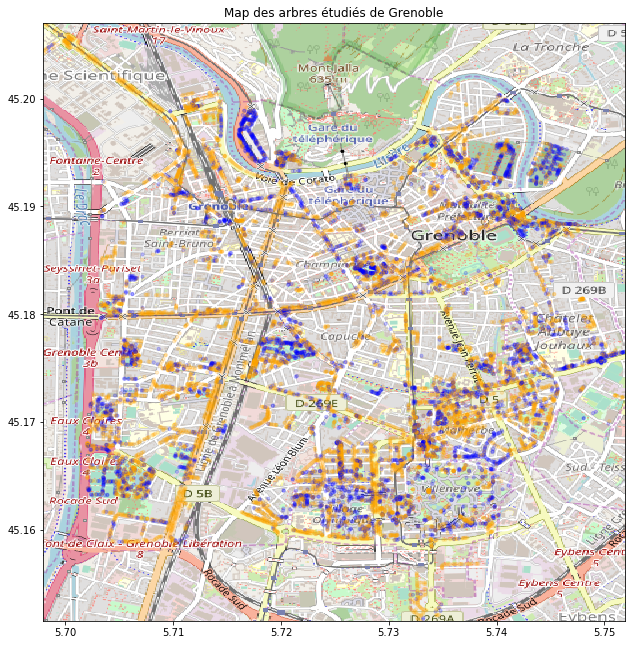

In [84]:
fig, ax = plt.subplots(figsize = (16,11))
ax.scatter(V_coords[:,0], V_coords[:,1], zorder=1, alpha= 0.2, c=C, s=10)
ax.set_title('Map des arbres étudiés de Grenoble')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Ici on visualise la représentation du nombre de défauts sur les arbres, sur la carte de Grenoble.

In [107]:
nb_defaut = np.array(data[['Collet']]) + np.array(data[['Houppier']]) + np.array(data[['Racine']]) +np.array(data[['Tronc']])
nb=len(nb_defaut)
Col=[]
for i in range (0,nb):
        if (nb_defaut[i,0]==0):
            Col.append('y')
        elif (nb_defaut[i,0]==1):
            Col.append('m')
        elif (nb_defaut[i,0]==2):
            Col.append('r')
        elif (nb_defaut[i,0]==3):
            Col.append('blue')
        else :
            Col.append('black')
Col=np.array(Col)


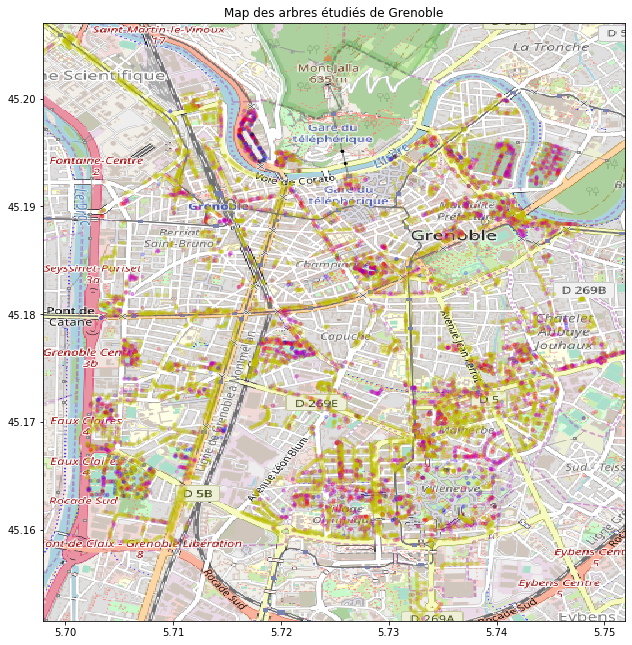

In [108]:
fig, ax = plt.subplots(figsize = (16,11))
ax.scatter(V_coords[:,0], V_coords[:,1], zorder=1, alpha= 0.2, c=Col, s=10)
ax.set_title('Map des arbres étudiés de Grenoble')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

Xcoord=np.array(data[['coord_x','coord_y']])
ycoord=np.array(data['DEFAUT'])

clfcoord = RandomForestRegressor(random_state=1,n_estimators=10)
scorescoord = cross_val_score(clfcoord, X, y, cv=5)
print('Score de notre Random Forest Regressor pour un défaut : ',scorescoord.mean())

Score de notre Random Forest Regressor pour un défaut :  0.5741767112362927
